# Neural Networks Basics

# Introduction

This tutorial aims at providing a practical approach in understanding the basic building block of neural networks: <b>The Neuron</b><br>
This first notebook contains an introduction of the concepts, then we will proceed with practical examples.

<br>MNIST: a large database of handwritten digits that is commonly used for training various image processing systems.<br>
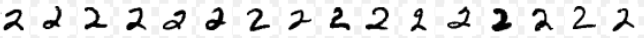
<br>How can we write a program that recognize all digits above are 2?

<br>Paradigm shift
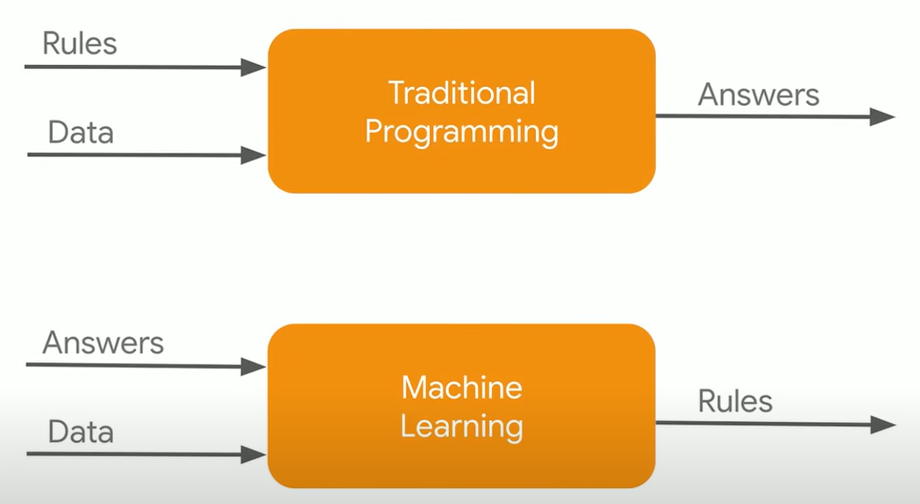

<br>Neural networks are combinations of neurons arranged in layers (input, hidden, output).


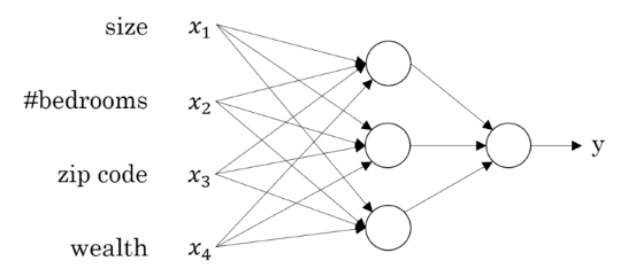

House price neural network

# The Neuron

This introduction focuses on how a single neuron works.


You may see in the picture above, the output of a neuron is computed as a weighted sum of its inputs followed by an activation function (sigma) that we will discuss later.

A neuron in an artificial neural network is responsible for learning the weights of the inputs - w<sub>i</sub> - that minimize the distance between the output of the neuron and the true output. Thus, a training set with known input-output pairs is provided to the neural network, from which the neurons are learning the weights of the inputs.

The algorithm implemented by a neuron is detailed as:
<br>
For number of iterations:
1. <b>forward propagation</b>: compute current output as the weighted sum of the inputs plus bias
2. apply an <b>activation function</b>: (e.q. sigmoid)
3. <b>compute loss</b> (distance between computed output and true output)
4. <b>compute the derivative of the loss function with respect to the weights of the inputs</b>. This tells us how much the loss will change when we change the weights and allows minimization of the loss.
5. <b>gradient descent</b>: adjust weights to minimize loss.

Let us write python code that implements above functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Forward Propagation

Using numpy ndarray capabilities we may process all training data (X) in a single step.
The code below computes sum(w<sub>i</sub> * x<sub>i</sub>) + b

<br>For a single training example:<br>
$$
\mathbf{Yhat}
=
\begin{bmatrix}
w_1 & \cdots & w_n
\end{bmatrix}
\cdot
\begin{bmatrix}
x_1 & \\
\vdots & \\
x_n
\end{bmatrix}
+ b
=
w_1*x_1 + \cdots + w_n*x_n + b
$$

<br> For m training examples:<br>
$$
\mathbf{Yhat}
=
\begin{bmatrix}
w_1 & \cdots & w_n
\end{bmatrix}
\cdot
\begin{bmatrix}
x_{11} & \cdots & x_{1m} \\
\vdots \\
x_{n1} & \cdots & x_{nm}
\end{bmatrix}
+ b
=
\begin{bmatrix}
w_1*x_{11} + \cdots + w_n*x_{n1} + b \\
\vdots \\
w_1*x_{1m} + \cdots + w_n*x_{nm} + b \\
\end{bmatrix}
$$

In [2]:
def forward_propagation(X, W, b):
    return np.dot(W.T, X) + b

### 2. Activation Function

The output of forward propagation is provided as the input of the activation function. There are several types of activation functions which serve different purposes. Here is a short list of them:


1. identity function: does nothing - for gradual learning purpose, we will use this approach for the first exercises in this course. A neuron without an activation function is, as we will see, implementing linear regression.

2. sigmoid: The sigmoid function 1/(1+e<sup>-x</sup>) transforms the output to the interval (0..1). This activation function is used mostly for binary classification in the output layer of the neural network. We will use this function in the last exercise of this course so let us implement it now and plot its output.<br>
<i>softmax</i>: is another function used for classification of multiple outputs.

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

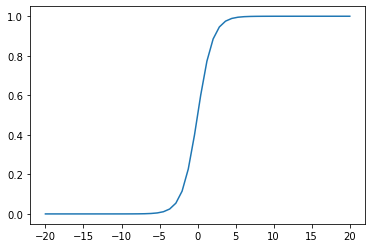

In [4]:
Xplt = np.linspace(-20, 20)
plt.plot(Xplt, sigmoid(Xplt), label='sigmoid')

3. relu (rectified linear unit) adds non-linearity to allow complex learning. We will not use this function as it is mostly used for the hidden layers of the networks, which we will not have in this course, that only aims to explain the function of one neuron.

### 3. Loss Function 

The Loss Function computes the distance from the neuron output (A) to the true output (Y).<br>
There are multiple widely used loss functions. For the scope of this course we will implement two of them.<br>
It is worth mentioning that in the choice of the loss function, one condition is the simplicity of the derivative of the function, that we will compute in the next step.

#### Mean Square Error 

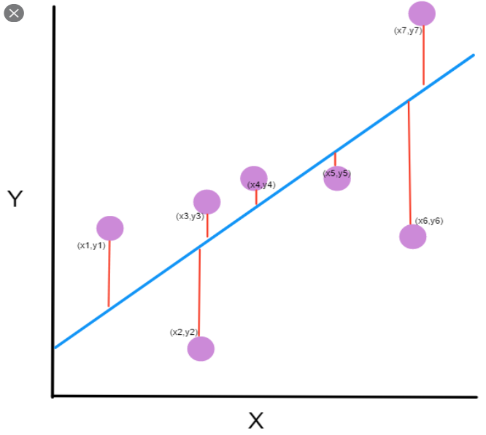

In [5]:
def compute_mse_loss(Y, A):
    return np.squeeze(np.sum(np.dot((Y-A).T,(Y-A)))/Y.shape[1])

#### Logistic Loss

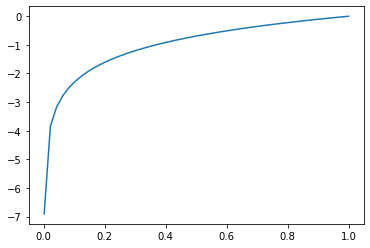

In [6]:
Xplt = np.linspace(0.001, 1)
plt.plot(Xplt, np.log(Xplt), label='log')

Logistic Loss is used in Logistic Regression. Logistic Regression outputs a 0 or 1 and is used for binary classification. The output of the sigmoid function (A) is mostly approaching 0 or 1. The true output of the training examples (Y) is either 0 or 1. By analyzing the implementation below :
- when Y=0; loss = ln(1-A)
- when Y=1; loss = ln(A)<br>  
(ln(0)=-infinite; ln(1)=0)<br><br>
you will notice when Y = 1 and A = 0 or viceversa, the logistic loss will approaches -infinite; when they are equal, the loss approaches 0; therefore, by minimizing the loss function we approach the true output.

In [7]:
def compute_logistic_loss(Y, A):
    return np.squeeze(-np.sum(Y * np.log(A)+ (1-Y) * np.log(1-A))/Y.shape[1])

In [8]:
Y = np.array([[0], [1]])
A = np.array([[0.99999], [0.0000001]])
compute_logistic_loss(Y, A)

27.631021115933102

### 4. Compute the Partial Derivatives of Loss Function with respect to weights of the inputs

There are online calculators for partial derivatives. For example: https://www.derivative-calculator.net/
For example, knowing that a = wx + b, enter the MSE function (y-wx-b)^2 and chose to differentiate by w. You will get -2x(-xw+y-b) = -2(y-a).<br>
The implementations below use the powerfull capabilities of numpy library to process all training examples in a single step. That is why we use capital letters (X, Y, A) to denote matrices and divide by the number of training examples.

#### Mean Square Error Partial Derivatives 

In [9]:
def compute_mse_derivatives(X, Y, A):
    dW = -2*np.sum(X*(Y - A), axis=1, keepdims=True)/Y.shape[1]
    db = -2*np.sum(Y - A)/Y.shape[1]

    return dW, db

#### Logistic Loss Partial Derivatives

In [10]:
def compute_logistic_derivatives(X, Y, A):
    dW = np.dot(X,(A-Y).T)/Y.shape[1]
    db = np.sum(A - Y)/Y.shape[1]

    return dW, db

### 5. Gradient Descent 

Gradient Descent is adjusting the weights in small steps to minimize the Loss. The algorithm is based on the property of the derivative of a function which is negative if the function decrease and positive if it increase. By subtracting the derivative we are always approaching the function minima.<br>
The steps size are adjusted by the learning rate (lr) parameter.


In [11]:
def gradient_descent(W, b, dW, db, lr):
    W = W - lr*dW
    b = b - lr*db
    return W, b

## Numpy and Array Dimensions 

An important aspect when working with numpy arrays is to understand and verify the dimensions of the arrays.
For our examples the dimensions are function of:
- n: number of input features and 
- m: number of training examples.<br>
<br>Thus, we have:
- X: (n, m)
- W: (n, 1)
- Y: (1, m)
- b: (1, 1)<br>
We may verify the dimensions for expression Y = dot(W.T, X) + b as (1, m) = (1, n)(n, m) + (1, 1)
In this case, the (1, 1) dimension of b will be broadcast to (1, m) and added to the dot product of W.T and X.
<br>
Numpy will sometimes reduce the dimension of an array like W(n, 1) to W(n, ). That is a one-dimensional array and cannot be multiplied with X(n, m). In order to keep an array dimension we must use parameter 'keepdims=True' when needed.
When we want to force dimension reduction we may use np.squeeze.
<br>
Whenever you are not sure about the dimension of your arrays use <b>shape</b> property of numpy arrays

## Putting all together: Training

Now that we defined what our neuron needs for learining, we can put everything together.

In [12]:
def nn_train(X, Y, W, b, lr, epochs, activation, loss):
    #for display
    weight = []
    bias = []
    cost = []
    
    for i in range(epochs):
        Yhat = forward_propagation(X, W, b)
        if activation == 'identity':
            A = Yhat
        if activation == 'sigmoid':
            A = sigmoid(Yhat)
        if loss == 'mse':
            J = compute_mse_loss(Y, A)
            dW, db = compute_mse_derivatives(X, Y, A)
        if loss == 'logistic':
            J = compute_logistic_loss(Y, A)
            dW, db = compute_logistic_derivatives(X, Y, A)
        W, b = gradient_descent(W, b, dW, db, lr)

        #save for display
        cost.append(J)
        weight.append(W)
        bias.append(b)
        
        if i%1000 == 0 :
            print("------------------------------ epoch" + str(i) + "------------------------------------")
            print("loss = " + str(J))
            print("W = " + str(np.squeeze(W)))
            print("b = " + str(b))

    #display
    plt.figure(figsize=(16, 10))
    plt.subplot(131)
    plt.axis([0, epochs, 0, cost[-1]*10])
    plt.plot(cost, label='Loss')
    plt.subplot(132)
    for j in range(W.shape[0]):
        plt.plot(np.asarray(weight)[:, j], label='w'+str(j+1))
    plt.plot(bias, label='b')
    plt.legend()
    return W, b

#### Prediction 

After our neuron learns the weights the output prediction of a new input is simply obtain by running the input through the forward_propagation function

Now we defined our neuron function so let's put it to work